# Echantillonneur de Gibbs

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import gamma
import matplotlib.pyplot as plt

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html

In [2]:
gamma.pdf(2, 2, 0, 1/3)
np.random.seed(123)

In [31]:
m0 = 5
s0 = 4
alpha = 3
beta = 0.5
nbChauffe = 20000
nbEchantillon = 2000 + nbChauffe

In [32]:
m = np.sqrt(s0) * norm.rvs(loc = m0, scale = 1, size = 1)
s = 1 / gamma.rvs(a = alpha, loc = 0, scale = 1 / beta, size = 1)
Y = norm.rvs(loc = m, scale = np.sqrt(s), size = nbEchantillon)

https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html

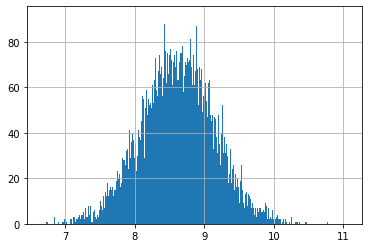

In [33]:
plt.hist(Y.flatten(),bins=1000)
plt.grid()
plt.show()

In [34]:
print('m : {}, s = {}'.format(m,s))

m : [8.61458824], s = [0.2877234]


In [35]:
from scipy.io import savemat
mesDonnees1 = {'Y' : Y,
              'm0' : m0,
              's0' : s0,
              'alpha' : alpha,
              'beta' : beta}
savemat('Gibbs.mat', mesDonnees1)
mesDonnees2 = {'m' : m,
               's' : s}
savemat('GibbVraiesValeur.mat', mesDonnees2)

In [36]:
del m0
del s0
del alpha
del beta
del m
del s
del Y

In [37]:
from scipy.io import loadmat
matDonnees = loadmat('Gibbs')
matVraieDonnees = loadmat('GibbVraiesValeur')

In [38]:
Y = matDonnees['Y']
m0 = matDonnees['m0']
s0 = matDonnees['s0']
alpha = matDonnees['alpha']
beta = matDonnees['beta']

In [39]:
m = matVraieDonnees['m']
s = matVraieDonnees['s']
print(len(Y.flatten()))

22000


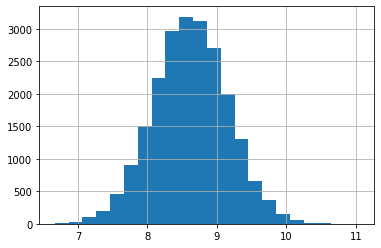

In [40]:
plt.figure()
plt.hist(Y.flatten(),bins = int(len(Y.flatten())/1000))
plt.grid()
plt.show()

In [46]:
from IPython.display import clear_output

X = np.zeros(shape = (2, nbEchantillon))
X[0, 0] = norm.rvs(loc = m0, scale = np.sqrt(s0), size = 1)
X[1, 0] = 1 / gamma.rvs(a = alpha, loc = 0, scale = 1 / beta, size = 1)
for i in range(1, nbEchantillon, 1):
    M = (s0 / (nbEchantillon * s0 + X[1, i - 1])) * np.sum(Y) + m0 * X[1, i-1] / (nbEchantillon * s0 + X[1,i-1])
    S = s0 * X[1, i-1] / (nbEchantillon * s0 + X[1, i-1])
    X[0, i] = norm.rvs(loc = M, scale = np.sqrt(S), size = 1)
    A = alpha + (nbEchantillon / 2)
    u = (Y - X[0, i])
    v = (Y - X[0, i]).reshape(-1, 1)
    B = beta + 0.5 * (u @ v)
    X[1, i] = 1 / gamma.rvs(a = A, loc = 0, scale = 1 / B, size = 1)

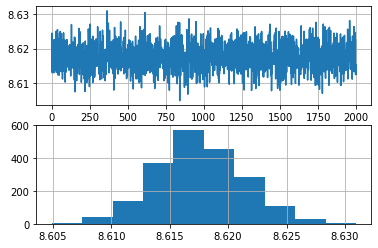

In [47]:
plt.subplot(2,1,1)
plt.plot(X[0, nbChauffe : nbEchantillon])
plt.grid()
plt.subplot(2,1,2)
plt.hist(X[0, nbChauffe : nbEchantillon])
plt.grid()
plt.show()

In [48]:
mHat = np.sum(X[0, nbChauffe : nbEchantillon]) / len(X[0, nbChauffe : nbEchantillon])
print('Estimation de m : ', mHat)

Estimation de m :  8.617519517345205


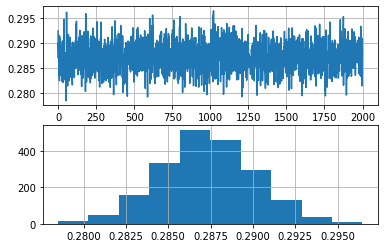

In [49]:
plt.subplot(2,1,1)
plt.plot(X[1, nbChauffe : nbEchantillon])
plt.grid()
plt.subplot(2,1,2)
plt.hist(X[1, nbChauffe : nbEchantillon])
plt.grid()
plt.show()

In [50]:
sHat = np.sum(X[1, nbChauffe : nbEchantillon]) / len(X[1, nbChauffe : nbEchantillon])
print('Estimation de s : ', sHat)

Estimation de s :  0.28727648846856063
